Import panda, numpy, matplotlib, pyplot and seaborn

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# importing csv file from local machine like r'path'
# reading in dataset with panda
df = pd.read_csv(r'C:\Users\Name\Jupyter Projects\DataSets\Iris Species\Iris\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Dropping the 'Id' column from our dataframe (since we don't need an additional index).
df.drop("Id", axis=1, inplace=True)

# Viewing our modified dataframe.
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Importing the Label Encoder Class from sklearn
from sklearn.preprocessing import LabelEncoder

# Creating a new label Encoder object
# Encode target labels with value between 0 and n_classes-1.
encoder = LabelEncoder()

# Using the "fit_transform" method to label encode the 'Type' column 0: Private 1: Public In-State  2:Public Out-of-State
df["Species"] = encoder.fit_transform(df["Species"])

df.head(15)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [8]:
# importing the 'Train Test_split' function from scikit-learn 'model_selection' package
from sklearn.model_selection import train_test_split

# Splitting up our data dataframe into x and y subsets(x are the independ variables and y is the dependent variable types)
x_data = df.drop("Species",axis=1)
y_data = df["Species"]

# Retriveing X and Y train-test sets by calling the 'train_test_split' function (80-20 Split) 
x_train, x_test, y_train , y_test = train_test_split(x_data, y_data, test_size=0.2)

In [9]:
# Importing the RandomForestClassifier Class from Scikit-Learn's 'ensemble' package.
from sklearn.ensemble import RandomForestClassifier

# Creating a new classifier with twenty individual decision trees used to build the random forest.
model = RandomForestClassifier(n_estimators=20)

# Training our model on the X and Y train sets.
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [10]:
model.score(x_test, y_test)

0.9

In [11]:
# Examining the fratures for the independent variable 

# Feautures of little importance [Eliminated]
# Features of high Importance {Promoted}

In [12]:
# Printing out the importance for each independent variable (feature) with the "feature_importances_" field.
feature_imp = pd.Series(model.feature_importances_, index=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]).sort_values(ascending=False)
feature_imp

# See which variables contribute the most and which contribute the least





Petal Length    0.437962
Petal Width     0.379278
Sepal Length    0.142785
Sepal Width     0.039975
dtype: float64

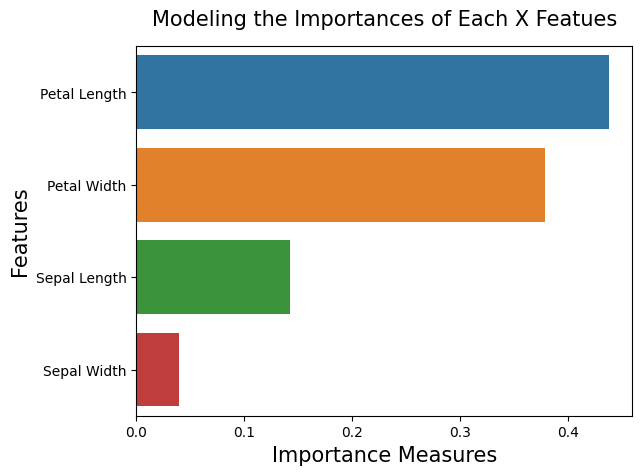

In [13]:
sns.barplot(x = feature_imp, y=feature_imp.index)

plt.title("Modeling the Importances of Each X Featues", pad=15,fontsize=15)
plt.xlabel("Importance Measures", fontsize=15)
plt.ylabel("Features", fontsize=15)

plt.show()

In [14]:
# According to the bar graph,"Sepal Length" & "Sepal Width" Represent a low importances with the featurs we have added
# We will drop the 3 columns: Sepal Length ,Sepal Width and Sepcies on the x variables, y variables will stay the same
# Dropping all non-predicate independent varialbes
x_data = df.drop(["SepalLengthCm", "SepalWidthCm","Species"],axis=1)

y_data = df["Species"]

# The Iris Table 
x_data.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [15]:
# Performing our train-test split again on the new x and y datasets.
# Changed the test_size from 0.2 to 0.1 to get a higher accuracy rating
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

# Fitting a Random Forest model to our new training data.
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)

# Printing out the accuracy measure of our model.
print("Model Accuracy: " + str(model.score(x_test, y_test)))

Model Accuracy: 1.0


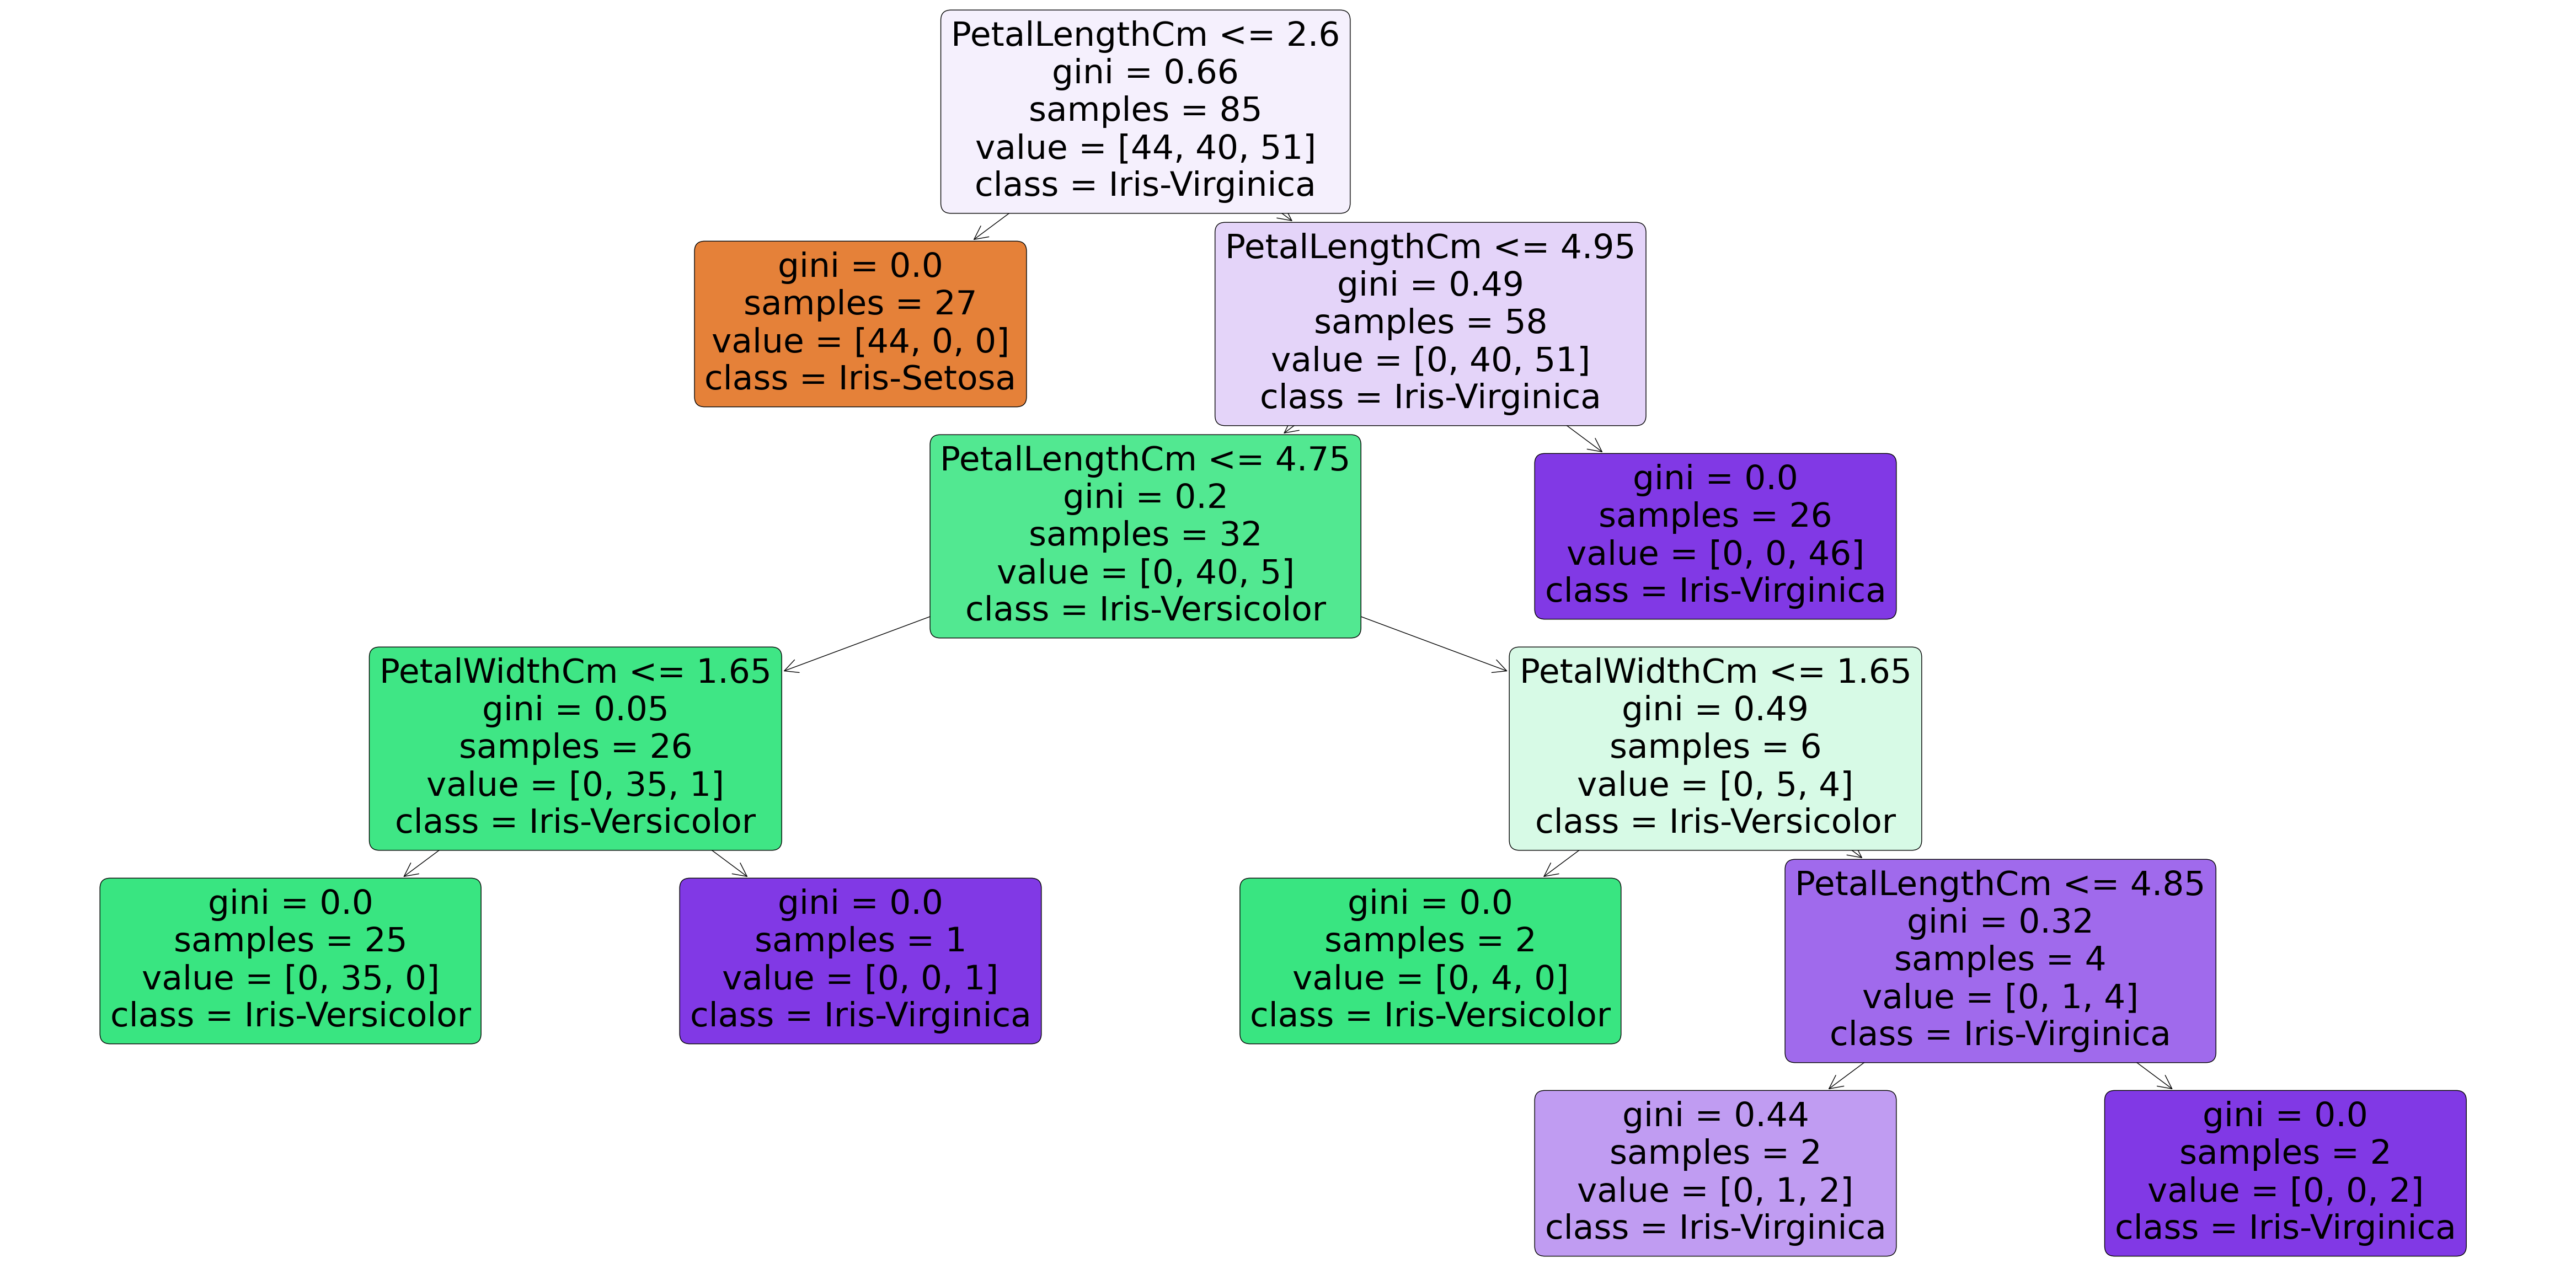

In [16]:
# Importing the 'plot_tree' function (to be used for visualization purposes).
from sklearn.tree import plot_tree

# Setting the size of our figure to 60 by 30.
plt.figure(figsize=(60,30))

# Visualizing one of the decision trees from our Random Forest model.
plot_tree(model.estimators_[5], 
          filled=True,  # specifies whether or not the decision nodes should be filled appropriately or not.
          feature_names = ["PetalLengthCm", "PetalWidthCm"], # names of our independent variables.
          class_names = ["Iris-Setosa", "Iris-Versicolor", "Iris-Virginica"], # values of our dependent variable.
          rounded = True, # rounding probablities.
          proportion = False, # removing percentages.
          precision = 2); # setting number of significant figures to two.